# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

#### План

1. Изучить данные  
2. Провести предобработку  
3. Провести обучение и проверку результатов модели на имеющихся данных  
4. Проверить соотношение классов  
5. Провести балансировку классов  
6. Провести обучение нескольких моделей на сбалансированных данных  
7. Определить лучшую модель и провести проверку на тестовой выборке

# 1. Подготовка данных

In [1]:
import pandas as pd

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, mean_squared_error

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
df=pd.read_csv('/datasets/Churn.csv')

In [7]:
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [8]:
df.columns = map(str.lower, df.columns)

In [9]:
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
rownumber          10000 non-null int64
customerid         10000 non-null int64
surname            10000 non-null object
creditscore        10000 non-null int64
geography          10000 non-null object
gender             10000 non-null object
age                10000 non-null int64
tenure             9091 non-null float64
balance            10000 non-null float64
numofproducts      10000 non-null int64
hascrcard          10000 non-null int64
isactivemember     10000 non-null int64
estimatedsalary    10000 non-null float64
exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [11]:
df[df['tenure'].isna()]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [12]:
df['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

In [13]:
df['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

В столбце tenure значительно количество пропусков. Чтобы не терять 10% данных, заполним пропущенные значения. Попробуем их предсказать. Учитывая, что значения дискретные, используем модель классификации. Но предварительно необходимо подготовить данные. Преобразовать категориальные признаки, масштабировать численые.
  
Столбцы с номером строки, id и фамилией клиента не несут какой-либо полезной нагрузки в плане обучения модели. Их можно удалить.

In [14]:
df = df.drop(['customerid','rownumber','surname'], axis = 1)

In [15]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Преобразуем категориальные признаки методом прямого кодирования

In [16]:
df_ohe = pd.get_dummies(df, drop_first=True)

In [17]:
df_ohe.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Разобъем данные на обучающую (X) и искомую (Y) выборки.

In [18]:
x_features = df_ohe[~df_ohe['tenure'].isna()].drop('tenure', axis =1)

In [19]:
x_target = df_ohe[~df_ohe['tenure'].isna()]['tenure']

In [20]:
y_features = df_ohe[df_ohe['tenure'].isna()].drop('tenure', axis =1)

In [21]:
y_target = df_ohe[df_ohe['tenure'].isna()]['tenure']

Проведем масштабирование численных признаков. Предварительно разделим имеющуюся обучающую выборку на обучающую, валидационную и тестовую.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
df_ohe.columns

Index(['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited', 'geography_Germany',
       'geography_Spain', 'gender_Male'],
      dtype='object')

In [24]:
numeric=['creditscore', 'age', 'balance', 'numofproducts', 'estimatedsalary']

In [25]:
from sklearn.model_selection import train_test_split

Разобъём фрейм на выборки

In [26]:
x_train_big, x_test, y_train_big, y_test = train_test_split(x_features,x_target,test_size = 0.2, random_state = 0)

In [27]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_big, y_train_big,test_size = 0.25, random_state = 0)

Проведем масштабирование

In [28]:
scaler= StandardScaler()

In [29]:
scaler.fit(x_train[numeric])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
x_train[numeric] = scaler.transform(x_train[numeric])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
x_train.head()

,creditscore,age,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
7983,1.265936,-0.267988,0.594038,-0.917265,1,0,-0.431912,0,0,0,0
2685,0.288133,1.989756,-1.243044,0.801898,1,1,-0.396821,0,0,0,1
8988,-0.175038,-0.173915,0.599605,0.801898,0,0,1.185818,0,0,0,1
8104,1.214473,-0.738352,0.639644,0.801898,1,0,0.820433,0,0,0,0
7832,-0.802891,0.672739,-0.200369,-0.917265,0,1,1.552825,1,0,1,1


In [32]:
x_valid[numeric] = scaler.transform(x_valid[numeric])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [33]:
x_test[numeric] = scaler.transform(x_test[numeric])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Т.к. для подбора гиперпараметров я использовал алгоритмы RandomSearch И GridSearch, я также сохраняю большую обучающую выборку. Это весь фрейм минус тестовая выборка.

In [34]:
x_train_big = pd.concat([x_train, x_valid])

In [35]:
y_train_big = pd.concat([y_train, y_valid])

In [36]:
print(x_test.shape)
print(x_valid.shape)
print(x_train.shape)
print(x_train_big.shape)
print(df_ohe.shape)

(1819, 11)
(1818, 11)
(5454, 11)
(7272, 11)
(10000, 12)


##### Первую модель возьмем KNeighborsClassifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
import numpy as np

In [39]:
for i in np.arange(20,400,50):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(x_train, y_train)
    predictions = knc.predict(x_valid)
    print("Количество соседей =",i,'score=',knc.score(x_valid,y_valid))

Количество соседей = 20 score= 0.10506050605060506
Количество соседей = 70 score= 0.09790979097909791
Количество соседей = 120 score= 0.10176017601760176
Количество соседей = 170 score= 0.10121012101210121
Количество соседей = 220 score= 0.11221122112211221
Количество соседей = 270 score= 0.10946094609460946
Количество соседей = 320 score= 0.10671067106710672
Количество соседей = 370 score= 0.10946094609460946


In [40]:
for i in np.arange(170,270,5):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(x_train, y_train)
    predictions = knc.predict(x_valid)
    print("Количество соседей =",i,'score=',knc.score(x_valid,y_valid))

Количество соседей = 170 score= 0.10121012101210121
Количество соседей = 175 score= 0.1001100110011001
Количество соседей = 180 score= 0.09900990099009901
Количество соседей = 185 score= 0.1001100110011001
Количество соседей = 190 score= 0.10506050605060506
Количество соседей = 195 score= 0.1001100110011001
Количество соседей = 200 score= 0.09900990099009901
Количество соседей = 205 score= 0.10671067106710672
Количество соседей = 210 score= 0.10616061606160616
Количество соседей = 215 score= 0.1078107810781078
Количество соседей = 220 score= 0.11221122112211221
Количество соседей = 225 score= 0.11221122112211221
Количество соседей = 230 score= 0.11166116611661166
Количество соседей = 235 score= 0.10671067106710672
Количество соседей = 240 score= 0.11001100110011001
Количество соседей = 245 score= 0.10946094609460946
Количество соседей = 250 score= 0.10671067106710672
Количество соседей = 255 score= 0.10616061606160616
Количество соседей = 260 score= 0.10561056105610561
Количество сосед

In [41]:
for i in np.arange(215,230,1):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(x_train, y_train)
    predictions = knc.predict(x_valid)
    print("Количество соседей =",i,'score=',knc.score(x_valid,y_valid))

Количество соседей = 215 score= 0.1078107810781078
Количество соседей = 216 score= 0.1111111111111111
Количество соседей = 217 score= 0.11331133113311331
Количество соседей = 218 score= 0.11276127612761276
Количество соседей = 219 score= 0.11441144114411442
Количество соседей = 220 score= 0.11221122112211221
Количество соседей = 221 score= 0.11001100110011001
Количество соседей = 222 score= 0.10946094609460946
Количество соседей = 223 score= 0.11386138613861387
Количество соседей = 224 score= 0.11276127612761276
Количество соседей = 225 score= 0.11221122112211221
Количество соседей = 226 score= 0.10891089108910891
Количество соседей = 227 score= 0.10836083608360836
Количество соседей = 228 score= 0.10726072607260725
Количество соседей = 229 score= 0.11276127612761276


In [42]:
knc = KNeighborsClassifier(n_neighbors=219)

In [43]:
knc.fit(x_train_big, y_train_big)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=219, p=2,
                     weights='uniform')

In [44]:
knc.score(x_test,y_test)

0.10665200659703133

##### Попробуем модель RandomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
for i in np.arange(15,150,10):
    rfc  = RandomForestClassifier(random_state = 0, n_estimators = i)
    rfc.fit(x_train, y_train)
    print("Количество деревьев =",i,'точность=',rfc.score(x_valid,y_valid))

Количество деревьев = 15 точность= 0.09625962596259625
Количество деревьев = 25 точность= 0.10561056105610561
Количество деревьев = 35 точность= 0.1001100110011001
Количество деревьев = 45 точность= 0.1001100110011001
Количество деревьев = 55 точность= 0.11001100110011001
Количество деревьев = 65 точность= 0.10451045104510451
Количество деревьев = 75 точность= 0.1111111111111111
Количество деревьев = 85 точность= 0.10671067106710672
Количество деревьев = 95 точность= 0.10891089108910891
Количество деревьев = 105 точность= 0.10726072607260725
Количество деревьев = 115 точность= 0.10891089108910891
Количество деревьев = 125 точность= 0.10891089108910891
Количество деревьев = 135 точность= 0.11001100110011001
Количество деревьев = 145 точность= 0.10616061606160616


In [47]:
for i in np.arange(65,85):
    rfc  = RandomForestClassifier(random_state = 0, n_estimators = i)
    rfc.fit(x_train, y_train)
    print("Количество деревьев =",i,'точность=',rfc.score(x_valid,y_valid))

Количество деревьев = 65 точность= 0.10451045104510451
Количество деревьев = 66 точность= 0.10451045104510451
Количество деревьев = 67 точность= 0.10396039603960396
Количество деревьев = 68 точность= 0.1078107810781078
Количество деревьев = 69 точность= 0.10561056105610561
Количество деревьев = 70 точность= 0.11056105610561057
Количество деревьев = 71 точность= 0.1111111111111111
Количество деревьев = 72 точность= 0.10891089108910891
Количество деревьев = 73 точность= 0.1078107810781078
Количество деревьев = 74 точность= 0.11001100110011001
Количество деревьев = 75 точность= 0.1111111111111111
Количество деревьев = 76 точность= 0.11276127612761276
Количество деревьев = 77 точность= 0.11386138613861387
Количество деревьев = 78 точность= 0.10946094609460946
Количество деревьев = 79 точность= 0.11001100110011001
Количество деревьев = 80 точность= 0.1111111111111111
Количество деревьев = 81 точность= 0.10946094609460946
Количество деревьев = 82 точность= 0.10836083608360836
Количество дере

In [48]:
rfc  = RandomForestClassifier(random_state = 0, n_estimators = 77)

In [49]:
rfc.fit(x_train_big, y_train_big)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=77,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [50]:
rfc.score(x_test,y_test)

0.0879604178119846

Особой разницы с моделью ближайших соседей нет. Проверим полученную модель на адекватнось. Может, проще заполнить пропущенные значения константами.

In [51]:
const_median = pd.Series(y_train_big.median(),index = y_test.index) #константная модель, заполненная медианным значением

In [52]:
accuracy_score(const_median,y_test)

0.11874656404617923

Попытка заполнения пропущенных данных с помощью обученной модели не оправдала себя. Константная модель показала лучшую точность

Масштабируем численные признаки основной обучающей выборки

In [53]:
y_features[numeric] = scaler.transform(y_features[numeric])

In [54]:
y_features

,creditscore,age,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
30,-0.617623,0.014230,-1.243044,2.521061,1,0,0.695842,1,0,1,0
48,-1.039622,-0.079843,0.408632,-0.917265,0,1,-0.162387,0,1,0,1
51,-0.679379,-0.267988,1.090118,0.801898,0,0,-0.239460,0,1,0,1
53,0.041108,0.202375,0.762807,-0.917265,0,0,1.103772,1,1,0,1
60,0.936571,-0.362061,0.943245,-0.917265,0,0,-0.272602,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9944,0.957156,0.202375,1.798743,0.801898,1,1,0.659362,0,1,0,1
9956,-1.348402,0.672739,0.118290,-0.917265,1,0,0.296074,1,0,0,0
9964,-1.770402,-0.456133,0.635510,0.801898,0,0,0.225791,0,0,0,1
9985,0.082279,-0.267988,0.735322,0.801898,1,0,-0.059332,0,0,0,1


In [55]:
y_target = pd.Series(y_train_big.median(),index = y_features.index)

In [56]:
y_target

30      5.0
48      5.0
51      5.0
53      5.0
60      5.0
       ... 
9944    5.0
9956    5.0
9964    5.0
9985    5.0
9999    5.0
Length: 909, dtype: float64

Заполним пропущенные значения медианным значением.

In [57]:
df_ohe['tenure'] = df_ohe['tenure'].fillna(value = y_target)

In [58]:
df_ohe.loc[9985,'tenure']

5.0

In [59]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
creditscore          10000 non-null int64
age                  10000 non-null int64
tenure               10000 non-null float64
balance              10000 non-null float64
numofproducts        10000 non-null int64
hascrcard            10000 non-null int64
isactivemember       10000 non-null int64
estimatedsalary      10000 non-null float64
exited               10000 non-null int64
geography_Germany    10000 non-null uint8
geography_Spain      10000 non-null uint8
gender_Male          10000 non-null uint8
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


# 2. Исследование задачи

In [60]:
#функция получает на вход фрейм свойств и целевых признаков 
#и делит полученные фреймы на 4 подвыборки в соответствии с полученными долями
#1 - большая тренировочная - доля 1-b
#2 - тестовая - доля b
#3 - валидационная - доля a
#4 - малая тренировочная - доля 1-a-b
def split_twice(features,target,a,b):
    features_train_big, features_test, target_train_big, target_test = train_test_split(
                                                                features,target,test_size = b, random_state = 0)
    features_train, features_valid, target_train, target_valid = train_test_split(
                                                                features_train_big,target_train_big,test_size = a/(1-b), 
                                                                random_state = 0)
    print('Объектов в большой тренировочной выборке (features_train_big, target_train_big):',target_train_big.shape[0])
    print('Объектов в тестовой выборке (features_test, target_test):',target_test.shape[0])
    print('Объектов в валидационной выборке (features_valid, target_valid):',target_valid.shape[0])
    print('Объектов в малой тренировочной выборке (features_train, target_train):',target_train.shape[0])
    return features_train_big, target_train_big, features_test, target_test, features_valid, target_valid,features_train, target_train 

In [61]:
# функция принимает три выборки
# на первой выборке обучает объект класса scaler
# на основе обученного объекта масштабирует числовые признаки (в соответствии со списком числовых признаков numeric)
# возвращает выборки с масштабированными признаками в порядке получения
def scal_3df(features_train, features_valid, features_test, numeric):
    scaler= StandardScaler()
    scaler.fit(features_train[numeric])
    features_train_sc = features_train.copy()
    features_valid_sc = features_valid.copy()
    features_test_sc = features_test.copy()
    features_train_sc[numeric] = scaler.transform(features_train[numeric])
    features_valid_sc[numeric] = scaler.transform(features_valid[numeric])
    features_test_sc[numeric] = scaler.transform(features_test[numeric])
    return features_train_sc, features_valid_sc, features_test_sc

In [62]:
features = df_ohe.drop('exited', axis =1)

In [63]:
target = df_ohe.exited

C помощью функции разобъем имеющуюся выборку на 3 части. При этом в результате работы функции отедльно сохраняется большая тренировочная выборка, включающая в себя малую обучающую и валидационную. Это сделано для работы с алгоритмами GridSearch и RandomSearch, где валидация заложена изначально. 

In [64]:
features_train_big, target_train_big, features_test, target_test, features_valid, target_valid,features_train, target_train = (
            split_twice(features,target,.2,.2))

Объектов в большой тренировочной выборке (features_train_big, target_train_big): 8000
Объектов в тестовой выборке (features_test, target_test): 2000
Объектов в валидационной выборке (features_valid, target_valid): 2000
Объектов в малой тренировочной выборке (features_train, target_train): 6000


Масштабируем числовые признаки с помощью функции

In [65]:
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

In [66]:
features_train_sc, features_valid_sc, features_test_sc = scal_3df(features_train, features_valid, features_test, numeric)

In [67]:
features_train_big_sc = pd.concat([features_train_sc, features_valid_sc])

In [68]:
target_train_big = pd.concat([target_train, target_valid])

In [69]:
target_train_big

8997    0
2295    1
6793    1
2071    0
6344    0
       ..
4279    0
7712    0
6769    0
8589    0
6698    0
Name: exited, Length: 8000, dtype: int64

In [70]:
features_train_big_sc

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
8997,0.614238,-0.568058,0.023759,-1.211216,0.803737,1,0,-0.470238,0,0,0
2295,0.500880,0.100058,0.749225,-1.211216,-0.930947,0,1,0.917127,0,0,1
6793,-0.282322,1.054511,0.749225,0.811186,-0.930947,0,1,-1.725150,1,0,1
2071,0.366911,-0.281722,0.023759,-1.211216,0.803737,1,1,0.918915,0,1,0
6344,2.056978,0.195504,-0.701707,-1.211216,0.803737,1,0,0.500839,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4279,-0.478122,-0.568058,-0.701707,1.163423,-0.930947,0,0,-0.999761,0,0,1
7712,-1.086134,-0.854394,-0.701707,-1.211216,0.803737,1,0,1.219683,0,0,1
6769,1.150113,0.481839,0.749225,1.333658,-0.930947,0,0,-1.306245,0,0,0
8589,0.418438,-0.472613,0.023759,-1.211216,0.803737,0,1,1.067838,0,0,0


Для подбора гиперпараметров моделей воспользуемся алгоритмом RandomizedSearchCV, который позволяет довольно грубо исследовать широкие диапазоны значений. В ходе работы мы генерируем словарь param_dist, содержащий, для каждого гиперпараметра, диапазон значений, которые нужно испытать. Далее, мы инициализируем объект rs с помощью функции RandomizedSearchCV(), передавая ей модель, param_dist, число итераций и число кросс-валидаций, которые нужно выполнить.

In [71]:
rfc = RandomForestClassifier(random_state = 0)

In [72]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 3, stop = 120, num = 15)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 30, num = 7)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)]
param_dist = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(features_train_big_sc, target_train_big);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


На данной стадии полученный результат, может не дать нам наиболее интересных данных о диапазонах параметров, которые стоит изучить на следующем раунде оптимизации. Для того чтобы выяснить то, в каком диапазоне значений стоит продолжать поиск, создадим датафрейм, содержащий результаты работы алгоритма RandomizedSearchCV.

In [73]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,mean_test_score,rank_test_score
0,86,16,2,12,0.859750,1
1,28,11,2,11,0.859625,2
2,111,25,2,14,0.859375,3
3,28,30,2,14,0.859000,4
4,36,2,2,8,0.858250,5
5,120,25,14,10,0.858000,6
6,86,2,2,7,0.857625,7
7,120,11,2,8,0.857375,8
8,94,11,14,10,0.857375,8
9,86,20,14,9,0.857000,10


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

Для наглядности создадим столбчатые графики, на которых, по оси Х, расположены значения гиперпараметров, а по оси Y — средние значения, показываемые моделями. Это позволит понять то, какие значения гиперпараметров, в среднем, лучше всего себя показывают.

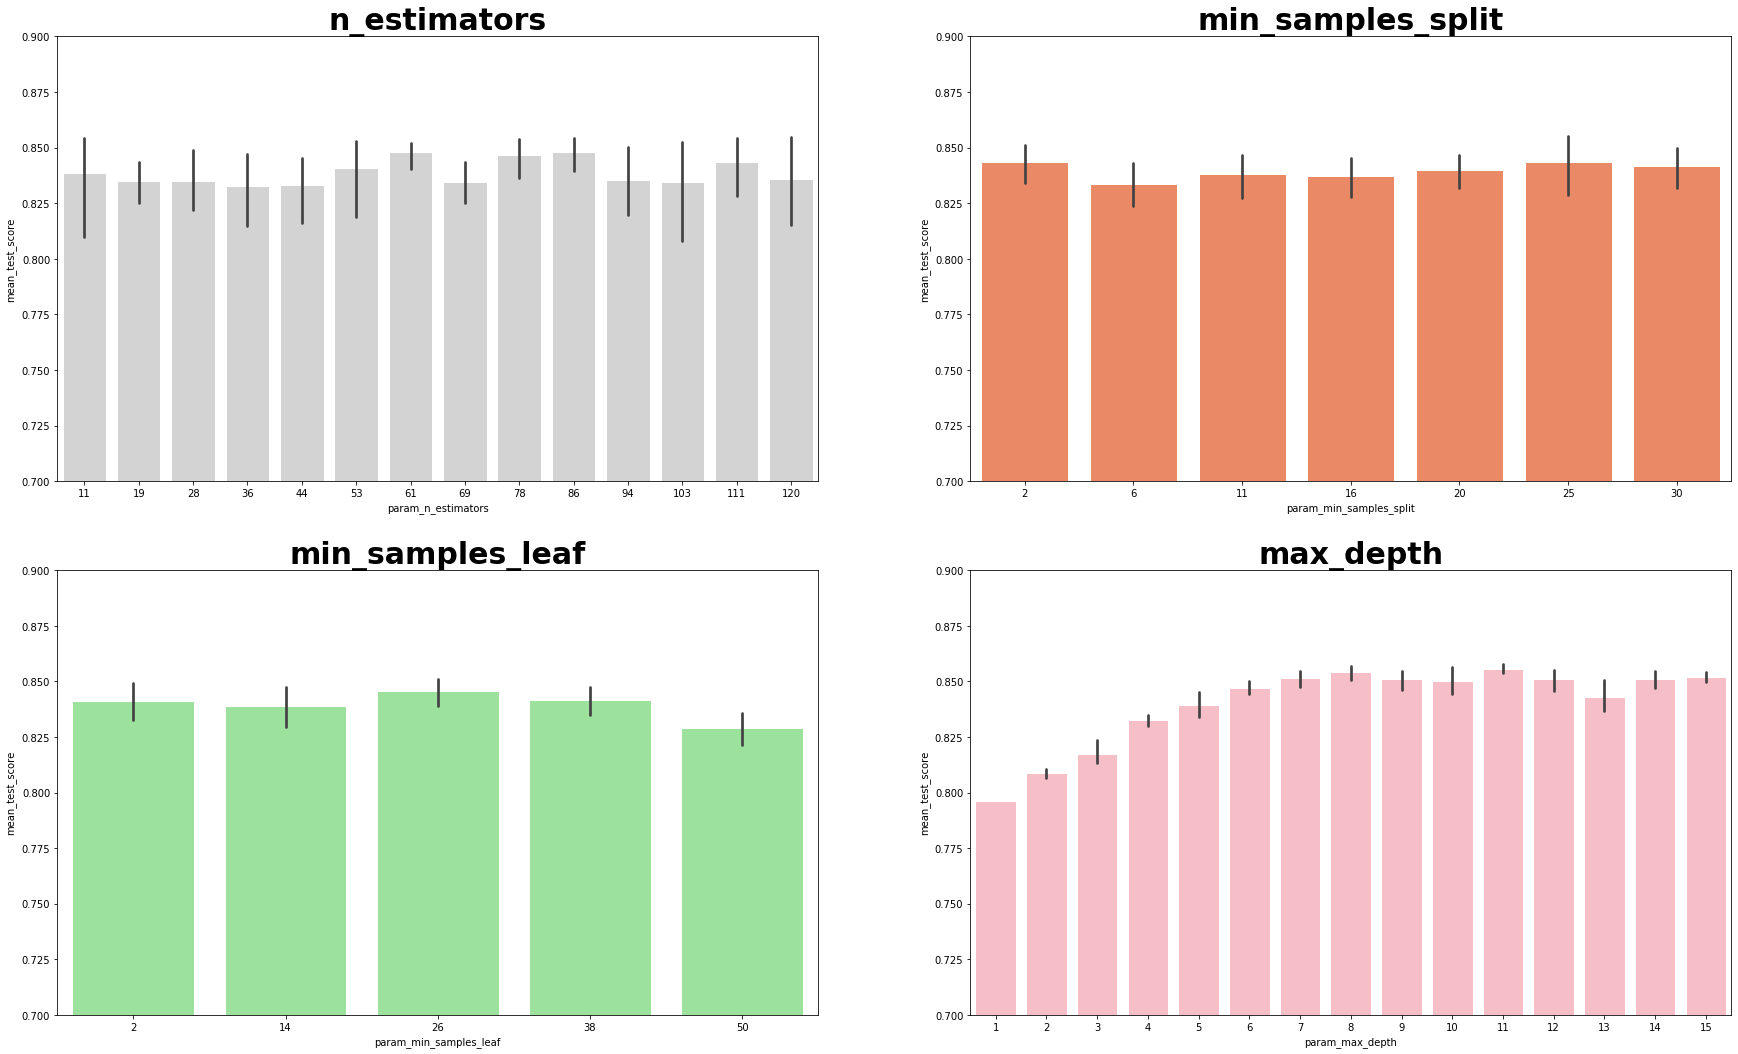

In [75]:
fig1, axs1 = plt.subplots(ncols=2, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig1.set_size_inches(30,18)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs1[0,0], color='lightgrey')
axs1[0,0].set_ylim([.7,.9])
axs1[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs1[0,1], color='coral')
axs1[0,1].set_ylim([.7,.9])
axs1[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs1[1,0], color='lightgreen')
axs1[1,0].set_ylim([.7,.9])
axs1[1,0].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs1[1,1], color='lightpink')
axs1[1,1].set_ylim([.7,.9])
axs1[1,1].set_title(label = 'max_depth', size=30, weight='bold')
plt.show()

Получаем следующее:  
•n_estimators: 61, 86  
•min_samples_split: можно исследовать несколько значений этого гиперпараметра - 2, 25.  
•min_samples_leaf: при небольших значениях этого гиперпараметра получаем более высокие результаты. Попробуем около 2, 26.  
•max_depth: 8, 11.  
  
Далее используем алгорим GridSearch, для более детального перебора.

In [76]:
from sklearn.model_selection import GridSearchCV
n_estimators = [61, 86]
max_depth = [8, 11]
min_samples_split = [2,25]
min_samples_leaf = [2, 26]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rfc = RandomForestClassifier(random_state = 0)
gs = GridSearchCV(rfc, param_grid,cv = 3, verbose = 1, n_jobs=-1)
gs.fit(features_train_big_sc, target_train_big);

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   33.2s finished


In [77]:
gs_df = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
gs_df = gs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
gs_df.head(10)

,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score,rank_test_score
0,11,2,2,86,0.861875,1
1,11,2,2,61,0.860000,2
2,11,2,25,86,0.859500,3
3,8,2,2,86,0.858625,4
4,11,2,25,61,0.858250,5
5,8,2,2,61,0.858125,6
6,8,2,25,61,0.856625,7
7,8,26,2,86,0.856500,8
8,8,26,25,86,0.856500,8
9,11,26,2,86,0.856000,10


In [78]:
rfc2 = (RandomForestClassifier(random_state=0,
                               max_depth =11,
                               min_samples_leaf=2,
                               min_samples_split =2,
                               n_estimators = 86))

In [79]:
rfc2.fit(features_train_big_sc, target_train_big);
rfc2.score(features_test_sc,target_test)

0.8675

In [80]:
predictions = rfc2.predict(features_test_sc)

In [81]:
f1_score(target_test, predictions)

0.6026986506746627

In [82]:
recall_score(target_test, predictions)

0.4962962962962963

In [83]:
precision_score(target_test, predictions)

0.767175572519084

In [84]:
probabilities = rfc2.predict_proba(features_test_sc)

In [85]:
probabilities_one = probabilities[:,1]

In [86]:
auc_roc = roc_auc_score(target_test,probabilities_one)

In [87]:
auc_roc

0.8769162893300825

Видно, что несмотря на достаточно высокое значение правильности (0,87) и приемлемое значение f1-меры =0,6. Метрика recall_score указывает, что модель обнаруживает менее 50% истинно положительных значений. При этом ложноположительных ответов не много precision = 0,77. Т.е. модель недообучена, ей не хватило примеров положительных ответов. Попробуем скорректировать модель, обучив ее на данных после балансировки классов.

# 3. Борьба с дисбалансом

Тестовая и большая обучающая выборки уже обработаны и сохранены в переменных features_train_big_sc, target_train_big и features_test_sc, target_test

In [88]:
from sklearn.model_selection import KFold

Тестовые сеты

In [89]:
features_test_sc.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
9394,-0.550259,-0.377168,1.111958,0.882951,-0.930947,1,1,1.611003,1,0,0
898,-1.312851,0.100058,-1.064440,0.433553,-0.930947,1,0,0.497536,0,0,0
2398,0.573017,0.290949,1.111958,0.312463,-0.930947,1,1,-0.421866,0,1,0
5906,1.418050,-0.663503,-0.338974,0.579108,-0.930947,0,0,-0.185178,0,0,1
2343,0.573017,-0.090832,0.023759,1.393051,0.803737,1,1,0.618343,1,0,1


In [90]:
features_test_sc.shape

(2000, 11)

In [91]:
target_test.shape

(2000,)

Сеты для обучающей и валидационной выборок, или train_big - для обучения выборанных моделей.

In [92]:
features_train_big_sc.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
8997,0.614238,-0.568058,0.023759,-1.211216,0.803737,1,0,-0.470238,0,0,0
2295,0.500880,0.100058,0.749225,-1.211216,-0.930947,0,1,0.917127,0,0,1
6793,-0.282322,1.054511,0.749225,0.811186,-0.930947,0,1,-1.725150,1,0,1
2071,0.366911,-0.281722,0.023759,-1.211216,0.803737,1,1,0.918915,0,1,0
6344,2.056978,0.195504,-0.701707,-1.211216,0.803737,1,0,0.500839,0,0,1


In [93]:
features_train_big_sc.shape

(8000, 11)

In [94]:
target_train_big.shape

(8000,)

In [95]:
target_train_big.value_counts()

0    6368
1    1632
Name: exited, dtype: int64

In [96]:
target_test.value_counts()

0    1595
1     405
Name: exited, dtype: int64

Видим, что количество положительных целевых признаков приблизительно в 4 раза меньше количества отрицательных.

#### Функция уменьшения положительной выборки 

In [97]:
from sklearn.utils import shuffle

In [98]:
# функция принимает на вход обучающие и целевой признаки, 
# а также во сколько раз мы хотим уменьшить количество положительных ответов
# в конце производится перемешивание строк
# возвращает два фрейма: признаки и целевой признак

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_ones.sample(frac=fraction, random_state=12345)] + [features_zeros])
    target_downsampled = pd.concat(
        [target_ones.sample(frac=fraction, random_state=12345)] + [target_zeros])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

#### Функция увеличения положительной выборки 

In [99]:
# функция принимает на вход обучающие и целевой признаки, 
# а также во сколько раз мы хотим увеличесть количество положительных ответов
# в конце производится перемешивание строк
# возвращает два фрейма: признаки и целевой признак
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [100]:
from sklearn.model_selection import KFold

Функция editsampe_cv получает как аргументы фрейм признаков, целевой признак, тип модели обучения, параметры для обучения модели, количество шагов кросс-валидации.  
Функция с помощью KFold разбивает фрейм на фолды. На каждой итерации проверяет объектов с каким целевым признаком больше и в зависимости от этого применяет либо upsample, либо downsample. Обучает модель на сбалансированном тренировочном фрейме. Проводит проверку на валидационной выборке. В список score заносит результаты предсказаний модели на каждом этапе кросс-валидации по метрикам F1 и roc-auc. Возвращает средние значения метрик.

In [101]:
def editsample_cv(features, target, model, params, cvn):
    # инициализация KFold с cvn фолдами
    cv  = KFold(n_splits=cvn, random_state=0, shuffle=True)
    f1scores=[]
    auc_roc_scores=[]
    # метод split возвращает индексы для объектов train и test
    for train_index, valid_index in cv.split(target):
        # формируем тренировочные и валидационные выборки признаков
        feature_train, feature_valid = features.iloc[train_index], features.iloc[valid_index]
        target_train, target_valid = target.iloc[train_index], target.iloc[valid_index]
        # определяем положительных или отрицательных ответов больше и в зависимости от значения коэффициента
        # применяем либо функцию upsample или downsample
        k = feature_train[target_train == 1]['age'].count()/feature_train[target_train == 0]['age'].count()
        if k<1:
            k = int((1-k)/k)
            features_upsampled, target_upsampled = upsample(feature_train,target_train,k)
        else:
            k = int(k)-1
            features_downsampled, target_downsampled = downsample(feature_train,target_train,1/k)
        
        # обучаем модель с переданными параметрами на сбалансированной тренировочной выборке
        model_obj = model(**params).fit(features_upsampled, target_upsampled)
        predictions = model_obj.predict(feature_valid)
        f1_scores = f1_score(target_valid,predictions)
        probabilities = model_obj.predict_proba(feature_valid)
        probabilities_one = probabilities[:,1]
        auc_roc = roc_auc_score(target_valid,probabilities_one)
        # заносим значения метрики в список
        f1scores.append(f1_scores)
        auc_roc_scores.append(auc_roc)
    f1_mean=np.mean(f1scores)
    auc_roc_mean = np.mean(auc_roc_scores)
    return f1_mean, auc_roc_mean
        

### Обучение моделей  
  
#### DecisionTreeClassifier

Для грубого подбора гиперпараметров используем вложенные циклы. В конце каждого шага цикла в список score_tracker заносятся гиперпараметры и среднее значение результата работы функции editsample_cv, т.е. среднее score из значений на каждом этапе кросс-валидации.  

In [102]:
%%time
score_tracker = []

params = {'max_depth': [int(x) for x in np.linspace(start = 1, stop = 25, num = 8)],
            'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 30, num = 7)],
            'min_samples_leaf': [int(x) for x in np.linspace(start = 2, stop = 35, num = 5)]}

for max_depth in params['max_depth']:
    for min_samples_split in params['min_samples_split']:
        for min_samples_leaf in params['min_samples_leaf']:
            example_params = {
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'random_state': 0}
        example_params['f1'], example_params['roc_auc'] = editsample_cv(features_train_big_sc, target_train_big, 
                                                DecisionTreeClassifier, example_params, 10)
        score_tracker.append(example_params)
        

CPU times: user 28.2 s, sys: 27.5 ms, total: 28.3 s
Wall time: 28.7 s


Функция rate преобразует список словарей - результат работы функции editsample_cv, во фрейм с сортировкой по правильности модели и выводит на экран первую десятку.

In [103]:
def rate(score_tracker):
    rate_list=pd.DataFrame(columns=list(score_tracker[0].keys()))
    for i in range(len(score_tracker)):
        for j in rate_list.columns:
            rate_list.loc[i,j]=score_tracker[i][j]
    print(rate_list.sort_values(by='f1', ascending = False).head(10))

In [104]:
pd.options.display.expand_frame_repr = False

In [105]:
rate(score_tracker)

   max_depth min_samples_split min_samples_leaf random_state        f1   roc_auc
28        14                 2               35            0  0.599931  0.826573
42        21                 2               35            0  0.599931  0.826568
31        14                16               35            0  0.599931  0.826573
32        14                20               35            0  0.599931  0.826573
33        14                25               35            0  0.599931  0.826573
34        14                30               35            0  0.599931  0.826573
35        18                 2               35            0  0.599931  0.826568
36        18                 6               35            0  0.599931  0.826568
37        18                11               35            0  0.599931  0.826568
38        18                16               35            0  0.599931  0.826568


Из предложенных параметров лучший результат, который получилось достичь 0.84

In [106]:
model_dtc = DecisionTreeClassifier(max_depth = 14, min_samples_split=2, min_samples_leaf = 35, random_state =0)

Теперь необходимо обучить модель на большой тренировочной сбалансированной выборке

In [107]:
target_train_big.value_counts()

0    6368
1    1632
Name: exited, dtype: int64

Сбалансируем большую тренировочную выборку

In [108]:
features_bigtrain_upsampled, target_bigtrain_upsampled = upsample(features_train_big_sc,target_train_big,4)

In [109]:
target_bigtrain_upsampled.value_counts()

1    6528
0    6368
Name: exited, dtype: int64

In [110]:
features_bigtrain_upsampled

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
5318,0.964618,-0.758949,-1.789907,0.666510,-0.930947,1,0,1.022706,0,1,1
4287,0.655459,1.340846,-1.427173,0.372445,-0.930947,1,1,-0.478036,1,0,1
9411,0.397827,0.100058,-0.338974,0.036642,4.273104,1,0,0.333638,1,0,0
1232,-0.653312,0.672730,1.474691,0.511559,-0.930947,1,0,0.683759,1,0,1
5538,0.686375,-1.045284,1.474691,0.106583,0.803737,0,0,-1.034476,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4921,-1.281935,-0.568058,1.111958,0.619921,0.803737,1,0,0.174908,0,1,0
6631,-0.385375,0.481839,-0.701707,-1.211216,0.803737,0,1,0.632741,0,0,1
5951,0.727596,0.195504,0.749225,-1.211216,0.803737,0,1,-0.677247,0,0,1
1219,0.439048,0.481839,0.023759,0.779130,0.803737,1,1,-0.920606,1,0,1


In [111]:
model_dtc.fit(features_bigtrain_upsampled,target_bigtrain_upsampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=35, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

#### RandomForestClassifier  
Произведем аналогичные действия с моделью Случайного леса

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
%%time
score_tracker = []

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 120, num = 6)]
max_depth = [int(x) for x in np.linspace(start = 3, stop = 15, num = 3)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 30, num = 3)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 4)]

params_rf = {'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
             'n_estimators': n_estimators}

for n_estimators in params_rf['n_estimators']:
    for max_depth in params_rf['max_depth']:
        for min_samples_split in params_rf['min_samples_split']:
            for min_samples_leaf in params_rf['min_samples_leaf']:
                example_params = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf':min_samples_leaf,
                    'random_state': 0}
            example_params['f1'], example_params['roc_auc'] = editsample_cv(features_train_big_sc, target_train_big, 
                                                    RandomForestClassifier, example_params, 10)
            score_tracker.append(example_params)

CPU times: user 4min 36s, sys: 822 ms, total: 4min 37s
Wall time: 4min 38s


In [114]:
rate(score_tracker)

   n_estimators max_depth min_samples_split min_samples_leaf random_state        f1   roc_auc
48          120         9                 2               50            0  0.609132  0.855909
50          120         9                30               50            0  0.609132  0.855909
49          120         9                16               50            0  0.609132  0.855909
40           98         9                16               50            0  0.608353  0.856123
41           98         9                30               50            0  0.608353  0.856123
39           98         9                 2               50            0  0.608353  0.856123
42           98        15                 2               50            0  0.607889  0.855972
43           98        15                16               50            0  0.607889  0.855972
44           98        15                30               50            0  0.607889  0.855972
32           76         9                30               50

In [115]:
model_rfc = RandomForestClassifier(n_estimators = 120, max_depth=9, min_samples_split=30, min_samples_leaf=50, random_state=0)

In [116]:
model_rfc.fit(features_bigtrain_upsampled,target_bigtrain_upsampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

##### KNeighborsClassifier

Здесь будем подбирать один гиперпараметр - количество соседей.

In [117]:
%%time
score_tracker = []
n_neighbors = [int(x) for x in np.linspace(start = 20, stop = 150, num = 20)]
param_kn = {'n_neighbors':n_neighbors}

for n_neighbors in param_kn['n_neighbors']:
    example_params = {'n_neighbors': n_neighbors}
    example_params['f1'], example_params['roc_auc'] = editsample_cv(features_train_big_sc, 
                                            target_train_big, KNeighborsClassifier, example_params, 10)
    score_tracker.append(example_params)

CPU times: user 1min 10s, sys: 35.7 ms, total: 1min 10s
Wall time: 1min 10s


In [118]:
rate(score_tracker)

   n_neighbors        f1   roc_auc
7           67  0.579405  0.838725
2           33  0.579232  0.834964
5           54  0.579214  0.838495
1           26   0.57806  0.832783
6           61  0.577952  0.839315
4           47  0.577175  0.839287
9           81  0.575989    0.8397
8           74  0.575186  0.839597
10          88  0.575117  0.839394
11          95  0.574567  0.839063


In [119]:
model_knc = KNeighborsClassifier(n_neighbors = 67)

In [120]:
model_knc.fit(features_bigtrain_upsampled,target_bigtrain_upsampled)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=67, p=2,
                     weights='uniform')

##### GradientBoostingClassifier

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

Тут из перебора пришлось удалить параметр min_samples_leaf, чтобы сократить время обучения

In [122]:
%%time
score_tracker = []

n_estimators = [int(x) for x in np.linspace(start=80, stop=150, num = 3)]
learning_rate = [float(x) for x in np.linspace(start=0.1, stop =.7, num=3)]
max_depth = [int(x) for x in np.linspace(start=5, stop=15, num = 3)]
min_samples_split = [int(x) for x in np.linspace(start=2, stop=30, num = 3)]
#min_samples_leaf = [int(x) for x in np.linspace(start=2, stop=25, num = 3)]

params_gb = {'learning_rate': learning_rate,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
             'n_estimators': n_estimators}

for learning_rate in params_gb['learning_rate']:
    for n_estimators in params_gb['n_estimators']:
        for max_depth in params_gb['max_depth']:
            for min_samples_split in params_gb['min_samples_split']:
                example_params = {
                        'learning_rate': learning_rate,
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'random_state': 0}
            example_params['f1'], example_params['roc_auc'] =(editsample_cv(features_train_big_sc, 
                                                     target_train_big, 
                                                     GradientBoostingClassifier, 
                                                     example_params, 5))
            score_tracker.append(example_params)

CPU times: user 6min 50s, sys: 203 ms, total: 6min 50s
Wall time: 6min 51s


In [123]:
rate(score_tracker)

   learning_rate n_estimators max_depth min_samples_split random_state        f1   roc_auc
3            0.1          115         5                30            0  0.624259  0.860139
0            0.1           80         5                30            0  0.618786  0.862534
6            0.1          150         5                30            0  0.615462  0.858041
15           0.4          150         5                30            0  0.589795     0.831
1            0.1           80        10                30            0  0.586624  0.844196
12           0.4          115         5                30            0  0.586545  0.834687
9            0.4           80         5                30            0  0.585938   0.83925
4            0.1          115        10                30            0  0.584711  0.842305
18           0.7           80         5                30            0  0.581941  0.827589
24           0.7          150         5                30            0  0.578672  0.821079

In [124]:
model_gb = GradientBoostingClassifier(learning_rate =.1,max_depth=5, n_estimators=115, min_samples_split=30,random_state = 0)

In [125]:
model_gb.fit(features_bigtrain_upsampled,target_bigtrain_upsampled)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=30,
                           min_weight_fraction_leaf=0.0, n_estimators=115,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Итого лучший результат показала моддель GradientBoosting - 0.62. RandomForest отстал незначительно - 0.61.   
Проверим обе модели на тестовой выборке

# 4. Тестирование модели

#### RandomForestClassifier  

In [126]:
model_rfc.score(features_test_sc, target_test)

0.785

In [127]:
predictions_rf = model_rfc.predict(features_test_sc)

In [128]:
f1_score(target_test, predictions_rf)

0.5981308411214953

In [129]:
recall_score(target_test, predictions_rf)

0.7901234567901234

In [130]:
precision_score(target_test, predictions_rf)

0.48120300751879697

In [131]:
probabilities = model_rfc.predict_proba(features_test_sc)

In [132]:
probabilities_one = probabilities[:,1]

In [133]:
auc_roc = roc_auc_score(target_test,probabilities_one)

In [134]:
auc_roc

0.8712303107705407

После проведения балансировки классов F1-score даже снизилась. Полнота предскзаний значительно увеличилась. Но вместе с тем увеличилось число ложноположительных ответов, значит модель переобучена. 

##### GradientBoostingClassifier

In [135]:
model_gb.score(features_test_sc, target_test)

0.8015

In [136]:
predictions_gb = model_gb.predict(features_test_sc)

In [137]:
f1_score(target_test, predictions_gb)

0.6065411298315164

In [138]:
recall_score(target_test, predictions_gb)

0.7555555555555555

In [139]:
precision_score(target_test, predictions_gb)

0.5066225165562914

In [140]:
probabilities = model_gb.predict_proba(features_test_sc)

In [141]:
probabilities_one = probabilities[:,1]

In [142]:
auc_roc = roc_auc_score(target_test,probabilities_one)

In [143]:
auc_roc

0.8696265335345796

In [144]:
from sklearn.metrics import roc_curve

In [145]:
fpr, tpr, threshold = roc_curve(target_test,probabilities_one)

Text(0.5, 1.0, 'ROC-кривая')

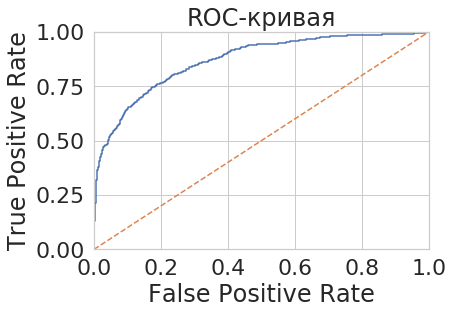

In [146]:
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')

In [147]:
for threshold in np.arange(.2, 0.8, 0.05):
    predicted_valid = probabilities_one > threshold
    precision = precision_score(target_test, predicted_valid)
    recall = recall_score(target_test, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))

Порог = 0.20 | Точность = 0.323, Полнота = 0.943
Порог = 0.25 | Точность = 0.361, Полнота = 0.916
Порог = 0.30 | Точность = 0.380, Полнота = 0.877
Порог = 0.35 | Точность = 0.413, Полнота = 0.847
Порог = 0.40 | Точность = 0.440, Полнота = 0.817
Порог = 0.45 | Точность = 0.473, Полнота = 0.783
Порог = 0.50 | Точность = 0.507, Полнота = 0.756
Порог = 0.55 | Точность = 0.541, Полнота = 0.716
Порог = 0.60 | Точность = 0.575, Полнота = 0.679
Порог = 0.65 | Точность = 0.620, Полнота = 0.652
Порог = 0.70 | Точность = 0.653, Полнота = 0.600
Порог = 0.75 | Точность = 0.693, Полнота = 0.551
Порог = 0.80 | Точность = 0.747, Полнота = 0.496


Значение F1-score удовлетворительно. Полнота положительных ответов 76%. Число ложноположительных ответов значительно, модель также переобучена. Значение метрики auc-roc 0.87 говорит о высоком качестве модели. Изменение порога классификации нецелесообразно, соотношение Точности и Полноты оптимально.

### Вывод 
На данных с несбалансированными классами несмотря на достаточно высокое значением метрики score и приемлемое значение Ф-меры модель получилась недообученная из-за малого количества объектов с положительным целевым признаком в обучающей выборке. Из-за чего модель правильно предсказывала менее 50% положительных ответов. После проведения балансировки классов полнота модели увеличилась до 0.76, но несколько снизилась точность. При этом значение Ф-меры удалось сохранить на заданном уровне.